In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

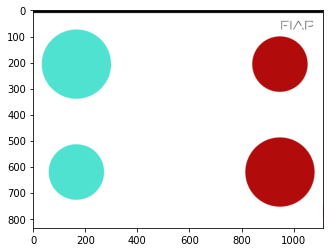

In [24]:
# Leitura da imagem para a cv2
circulo = cv2.imread("circulo.png")

cl_circulo = cv2.cvtColor(circulo, cv2.COLOR_BGR2RGB)


plt.imshow(cl_circulo)


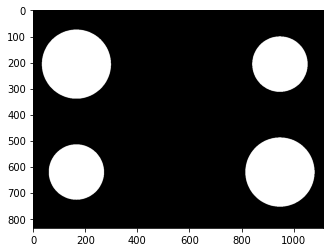

In [25]:
# # Máscara com HSV


circuloHSV = cv2.cvtColor(circulo, cv2.COLOR_BGR2HSV)
#Range menor começando no vermelho
circuloHSV_lower = np.array([0, 165, 89])
#Range maior terminando no verde
circuloHSV_higher = np.array([97, 255, 255])


mask_hsv = cv2.inRange(circuloHSV, circuloHSV_lower, circuloHSV_higher)

plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)

plt.show()




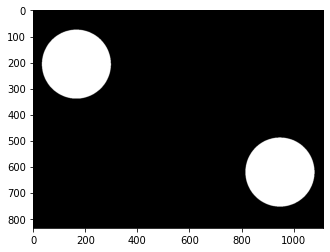

In [26]:
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
# Cópia da máscara para ser desenhada "por cima"
contornos_circulos = mask_rgb.copy()
#Range menor começando no vermelho
circuloHSV_lower = np.array([0, 165, 89])
#Range maior terminando no verde
circuloHSV_higher = np.array([97, 255, 255])
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

menor1 = None
menor2 = None
# Para encontrar os menores circulos, fizemos uma lista das 4 áreas e a ordenamos.
lista =[]
for i in contornos:
    area = int(cv2.contourArea(i))
    lista.append(area)
listaOrdenada = sorted(lista)
#Se o menor e o segundo menor equivalerem as respectivas áreas, então guarda o contorno
for c in contornos:
  area = int(cv2.contourArea(c))
  if listaOrdenada[0] == area:
    menor1 = c
  elif listaOrdenada[1] == area:
    menor2 = c
  elif listaOrdenada[2] == area:
    maior2 = c
  elif listaOrdenada[3] == area:
    maior3 = c



# Referência para thickness na drawContours: https: // stackoverflow.com/questions/19222343/filling-contours-with-opencv-python
# Essa propriedade (thickness) preenche o conteúdo do contorno, pintando os menores
cv2.drawContours(contornos_circulos, [menor1], -1, [0, 0, 0], thickness=cv2.FILLED)
cv2.drawContours(contornos_circulos, [menor2], -1, [0, 0, 0], thickness=cv2.FILLED)

plt.imshow(contornos_circulos)


In [27]:
#Centro de massa

#Preparo da imagem a partir da contornos circulos que tem apenas dois circulos
contornos_gray = cv2.cvtColor(contornos_circulos, cv2.COLOR_RGB2GRAY)

new_contornos, _ = cv2.findContours(contornos_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#Cálculo para o primeiro círculo
cnt1 = new_contornos[0]
M1 = cv2.moments(cnt1)
cx1 = int(M1['m10']/M1['m00'])
cy1 = int(M1['m01']/M1['m00'])

#Cálculo para o segundo círculo
cnt2 = new_contornos[1]
M2 = cv2.moments(cnt2)
cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

coord1 = (cx1, cy1)
coord2 = (cx2, cy2)

#Coordenadas do centro de massa
print(cx1, cy1)
print(cx2, cy2)


945 620
165 206


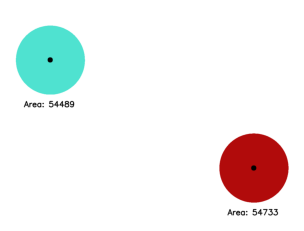

In [28]:

#Referência para uso de bitwiseNot e bitwiseOr: https://www.pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/
#Inverte os pixels
bl_circulo = cv2.bitwise_not(contornos_circulos)

#Utilizando bitwiseOr para não carregar da imagem original os dois círculos que haviam sido eliminados
img = cv2.bitwise_or(cl_circulo, bl_circulo)

# Pinta um círculo preto no centro de massa
cv2.circle(img, coord1, 10, (0, 0, 0), thickness=cv2.FILLED)
cv2.circle(img, coord2, 10, (0, 0, 0), thickness=cv2.FILLED)

img = cv2.putText(img, 'Area: 54733', (cx1-100, cy1+180),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
img = cv2.putText(img, 'Area: 54489', (cx2-100, cy2+180),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

plt.axis("off")
plt.imshow(img)



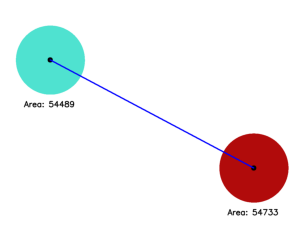

In [42]:
imgLinha = img.copy()

azul = (0, 0, 255)

cv2.line(imgLinha, coord1, coord2, azul, 3)

plt.axis("off")
plt.imshow(imgLinha)

0.487958927635022 radianos
28 graus


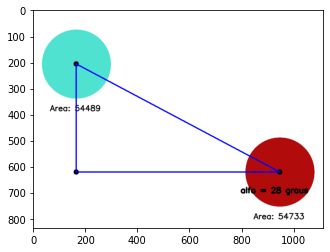

In [47]:
coord3 = (cx2, cy1)
pointsList = [coord1, coord2, coord3]

# Referência para a fórmula https: // felipemeganha.medium.com/como-calcular-%C3 % A2ngulos-com-python-e-opencv-4db69c1cee71

m = (cy1-cy2) / (cx1-cx2) #Coeficiente de inclinação da reta igual a tangente do ângulo

angR = np.arctan(m)  # Angulo em Radianos
angD = round(np.degrees(angR)) # Angulo em Grau

print(angR, "radianos")
print(angD, "graus")

# Estabelecendo o ponto para o triângulo retângulo
cv2.circle(imgLinha, coord3, 10, (0, 0, 0), thickness=cv2.FILLED)

# Fechando o triângulo retângulo com as linhas
cv2.line(imgLinha, coord2, coord3, azul, 3)
cv2.line(imgLinha, coord1, coord3, azul, 3)


imgLinha = cv2.putText(imgLinha, 'alfa = 28 graus', (cx1-150, cy1+80),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 3, cv2.LINE_AA)


plt.imshow(imgLinha)
